In [1]:
import os
import os.path as osp

from yolo_detection import *
from hough_circle_detection import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path_ds = "../../datasets/"
path_ds_test = osp.join(path_ds, "droplets", "test", "original")

In [3]:
path_images = [osp.join(path_ds_test, x) for x in os.listdir(path_ds_test)]

In [21]:
idx = 13

## YOLO

In [22]:
list_circles = get_circles_yolov5(path_images[idx])

YOLOv5 🚀 v6.0-151-gabbdd48 torch 1.10.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


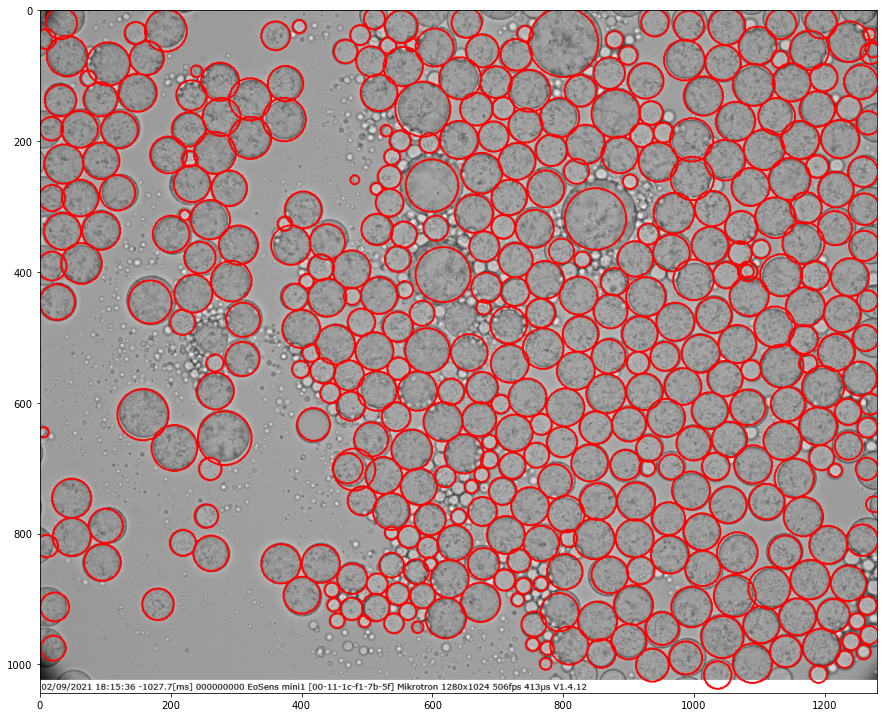

In [23]:
image = cv2.imread(path_images[idx])

image_copy = image.copy()
for circles in list_circles:
    for circle in circles:
        image_copy = cv2.circle(image_copy, (circle[0].astype(int), circle[1].astype(int)), circle[2].astype(int), (255, 0, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(image_copy)

## Hough

In [24]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
list_circles = hough_circle_detection(gray)

[[  0 255   0 ...  92  62  44]
 [ 72  77  84 ...  83  66  45]
 [ 74  79  87 ...  83  61  52]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


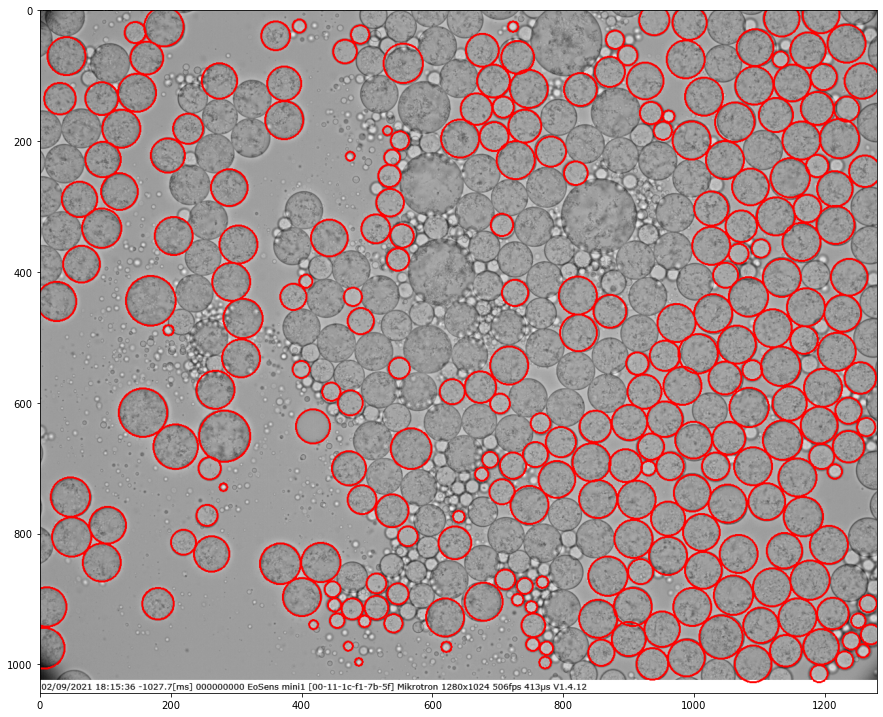

In [26]:
image_copy = image.copy()
for circles in list_circles:
    for circle in circles:
        image_copy = cv2.circle(image_copy, (circle[0].astype(int), circle[1].astype(int)), circle[2].astype(int), (255, 0, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(image_copy, cmap="gray", vmin=0, vmax=255)